In [1]:
pip install tensorflow numpy scikit-learn matplotlib


  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
train_dir = r'C:\Users\USER\Desktop\Spring 2024\Machine Learning intelligince\Assignment\PandaOrBear\PandasBears\Train'

In [4]:
test_dir = r'C:\Users\USER\Desktop\Spring 2024\Machine Learning intelligince\Assignment\PandaOrBear\PandasBears\Test'

In [5]:
# Image Data Generator for loading images
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

Found 500 images belonging to 2 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

Found 100 images belonging to 2 classes.


In [8]:
# Build a simple neural network model
model = Sequential([
    Flatten(input_shape=(256, 256, 1)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10
16/16 [==============================] - 3s 147ms/step - loss: 5.4389 - accuracy: 0.7440 - val_loss: 0.8519 - val_accuracy: 0.9500
Epoch 2/10
16/16 [==============================] - 2s 120ms/step - loss: 0.5649 - accuracy: 0.9500 - val_loss: 0.5393 - val_accuracy: 0.9700
Epoch 3/10
16/16 [==============================] - 2s 123ms/step - loss: 0.5664 - accuracy: 0.9660 - val_loss: 0.2570 - val_accuracy: 0.9800
Epoch 4/10
16/16 [==============================] - 2s 126ms/step - loss: 0.2092 - accuracy: 0.9800 - val_loss: 0.1185 - val_accuracy: 0.9700
Epoch 5/10
16/16 [==============================] - 2s 123ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.0160 - val_accuracy: 0.9900
Epoch 6/10
16/16 [==============================] - 2s 131ms/step - loss: 0.0085 - accuracy: 0.9960 - val_loss: 0.0151 - val_accuracy: 0.9900
Epoch 7/10
16/16 [==============================] - 2s 132ms/step - loss: 0.0050 - accuracy: 0.9960 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 

In [11]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Neural Network - Accuracy: {test_acc}")

4/4 [==============================] - 0s 64ms/step - loss: 0.0027 - accuracy: 1.0000
Neural Network - Accuracy: 1.0


In [12]:
# Extract features from the trained model for KNN and Decision Tree
feature_extractor = Sequential(model.layers[:-1])
train_features = feature_extractor.predict(train_generator)
test_features = feature_extractor.predict(test_generator)

4/4 [==============================] - 0s 59ms/step


In [13]:
# Get labels
train_labels = train_generator.classes
test_labels = test_generator.classes

In [14]:
# Train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_features, train_labels)


DecisionTreeClassifier(random_state=42)

In [15]:
# Evaluate the Decision Tree model
y_pred_dt = dt_classifier.predict(test_features)
accuracy_dt = accuracy_score(test_labels, y_pred_dt)
precision_dt = precision_score(test_labels, y_pred_dt)
recall_dt = recall_score(test_labels, y_pred_dt)
f1_dt = f1_score(test_labels, y_pred_dt)

In [16]:
print(f"Decision Tree - Accuracy: {accuracy_dt}")
print(f"Decision Tree - Precision: {precision_dt}")
print(f"Decision Tree - Recall: {recall_dt}")
print(f"Decision Tree - F1 Score: {f1_dt}")
print(confusion_matrix(test_labels, y_pred_dt))

Decision Tree - Accuracy: 0.44
Decision Tree - Precision: 0.4444444444444444
Decision Tree - Recall: 0.48
Decision Tree - F1 Score: 0.4615384615384615
[[20 30]
 [26 24]]


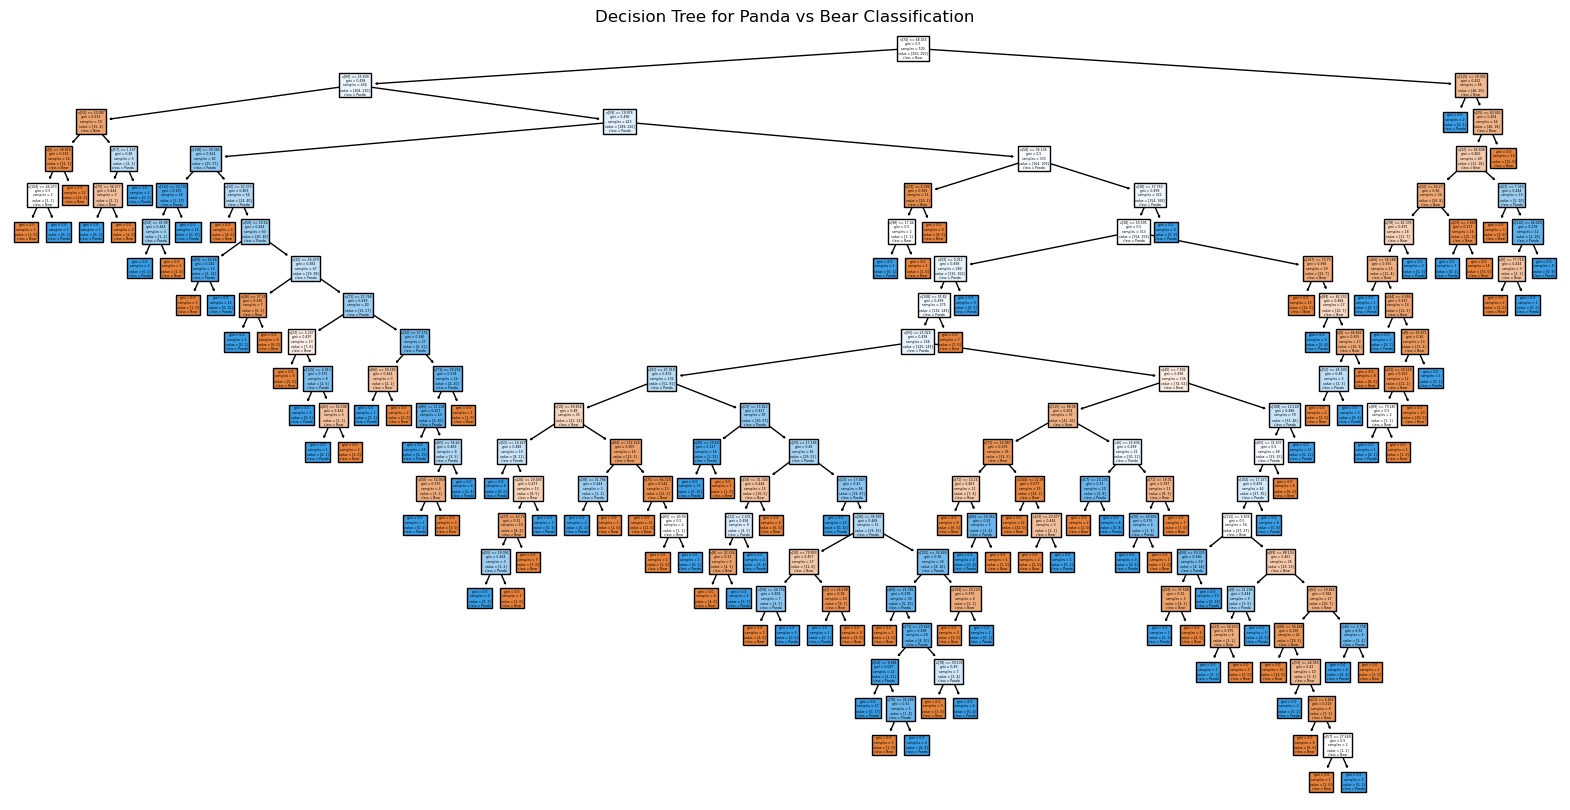

In [17]:
# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust the size to fit the entire tree
plot_tree(dt_classifier, filled=True, feature_names=None, class_names=['Bear', 'Panda'])
plt.title("Decision Tree for Panda vs Bear Classification")
plt.show()

In [18]:
# Train the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(train_features, train_labels)


KNeighborsClassifier()

In [19]:
# Evaluate the KNN model
y_pred_knn = knn_classifier.predict(test_features)
accuracy_knn = accuracy_score(test_labels, y_pred_knn)
precision_knn = precision_score(test_labels, y_pred_knn)
recall_knn = recall_score(test_labels, y_pred_knn)
f1_knn = f1_score(test_labels, y_pred_knn)

In [20]:
print(f"KNN - Accuracy: {accuracy_knn}")
print(f"KNN - Precision: {precision_knn}")
print(f"KNN - Recall: {recall_knn}")
print(f"KNN - F1 Score: {f1_knn}")
print(confusion_matrix(test_labels, y_pred_knn))

KNN - Accuracy: 0.41
KNN - Precision: 0.4
KNN - Recall: 0.36
KNN - F1 Score: 0.3789473684210526
[[23 27]
 [32 18]]


In [21]:
# Compare models
print("Neural Network vs Decision Tree vs KNN")
print(f"Neural Network - Accuracy: {test_acc}")
print(f"Decision Tree - Accuracy: {accuracy_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}")
print(f"KNN - Accuracy: {accuracy_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1 Score: {f1_knn}")

Neural Network vs Decision Tree vs KNN
Neural Network - Accuracy: 1.0
Decision Tree - Accuracy: 0.44, Precision: 0.4444444444444444, Recall: 0.48, F1 Score: 0.4615384615384615
KNN - Accuracy: 0.41, Precision: 0.4, Recall: 0.36, F1 Score: 0.3789473684210526
